Glass Identification Dataset
Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

 Id number: 1 to 214
 RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)
1- building_windows_float_processed
2- building_windows_non_float_processed
3- vehicle_windows_float_processed
4- vehicle_windows_non_float_processed (none in this database)
5- containers
6- tableware
7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 


Predict : Type of glass



In [1]:
import pandas as pd
url="identify_glass.csv"

col_names = ['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass['assorted'] = glass.glass_type.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [66]:
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted
id,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


In [3]:
! pip install seaborn

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

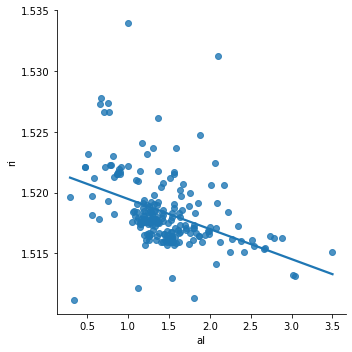

In [5]:
sns.lmplot(x='al', y='ri', data=glass, ci=None)

<AxesSubplot:xlabel='al', ylabel='ri'>

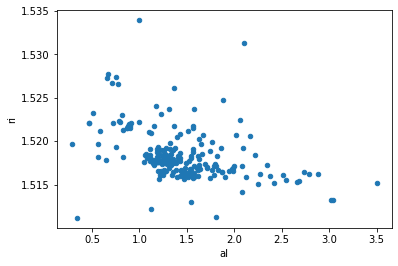

In [6]:
# scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

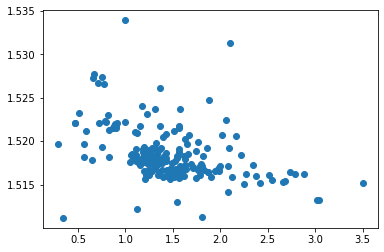

In [7]:
# scatter plot using Matplotlib
plt.scatter(glass.al, glass.ri)


In [8]:
# fit a linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri
linreg.fit(X, y)


LinearRegression()

In [14]:
# look at the coefficients to get the equation for the line, but then how do you plot the line?
print (linreg.intercept_)
print (linreg.coef_)


1.5219453302386425
[-0.00247761]


In [16]:
# Compute prediction for al=2 using the equation.
linreg.intercept_ + linreg.coef_[0] * 2

1.5169901174637033

In [19]:
# Compute prediction for al=2 using the predict method.
#linreg.predict(2)


In [17]:
# you could make predictions for arbitrary points, and then plot a line connecting them
print linreg.predict(1)
print linreg.predict(2)
print linreg.predict(3)


SyntaxError: invalid syntax (1093298588.py, line 2)

In [20]:
# Examine glass_type.
glass.glass_type.value_counts().sort_index()


1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

In [21]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted,household
id,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0,0


Text(0, 0.5, 'household')

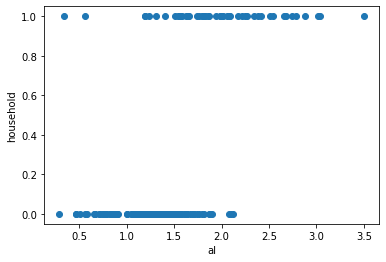

In [22]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household')

In [23]:
# Fit a linear regression model and store the predictions.
feature_cols = ['al']
X = glass[feature_cols] 
y = glass.household 
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X) # prediction via Lin Reg


Text(0, 0.5, 'household')

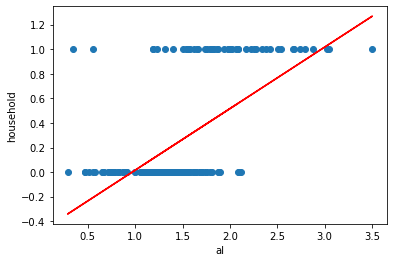

In [24]:
# Scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')


NameError: name 'ri_predict' is not defined

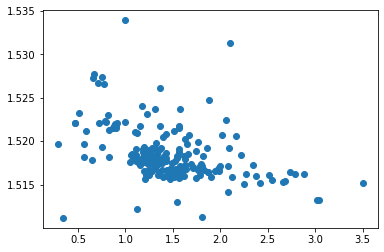

In [27]:
# put the plots together
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, ri_predict, color='red')


In [25]:
# Understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False.
np.where(nums > 10, 'big', 'small')


array(['small', 'big', 'small'], dtype='<U5')

In [28]:
# Transform household_pred to 1 or 0.
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()


,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted,household,household_pred,household_pred_class
id,,,,,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0,0,0.065459,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0,0,0.195765,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0,0,0.285976,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0,0,0.160682,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0,0,0.135623,0


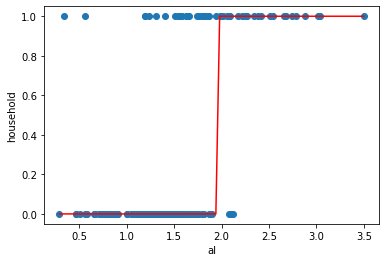

In [29]:
# sort so we can have a continuous line
glass.sort_values('al', inplace=True)
# Plot the class predictions.
plt.scatter(glass.al, glass.household)

plt.xlabel('al')
plt.ylabel('household')

plt.plot(glass.al, glass.household_pred_class, color='red')



In [30]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)

Text(0, 0.5, 'household')

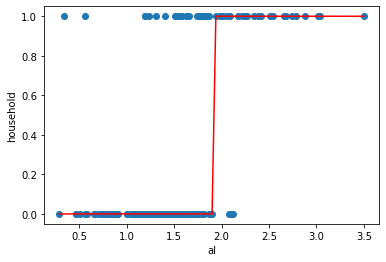

In [31]:
# Plot the class predictions.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')


In [32]:
logreg.predict_proba(X)[0:10]

array([[0.9939759 , 0.0060241 ],
       [0.99296771, 0.00703229],
       [0.98949363, 0.01050637],
       [0.98949363, 0.01050637],
       [0.98811597, 0.01188403],
       [0.98614074, 0.01385926],
       [0.98614074, 0.01385926],
       [0.98526292, 0.01473708],
       [0.9817376 , 0.0182624 ],
       [0.98117062, 0.01882938]])

In [33]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [34]:
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,assorted,household,household_pred,household_pred_class,household_pred_prob
id,,,,,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0,0,-0.340495,0,0.006024
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1,1,-0.315436,0,0.007032
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0,-0.250283,0,0.010506
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0,0,-0.250283,0,0.010506
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0,0,-0.230236,0,0.011884
184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.00,6,1,1,-0.205177,0,0.013859
110,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.00,2,0,0,-0.205177,0,0.013859
158,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3,0,0,-0.195154,0,0.014737
153,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.0,0.00,3,0,0,-0.160071,0,0.018262


Plot the predicted probabilities as a line on our plot (probability of household=1 as al changes).

Text(0, 0.5, 'household')

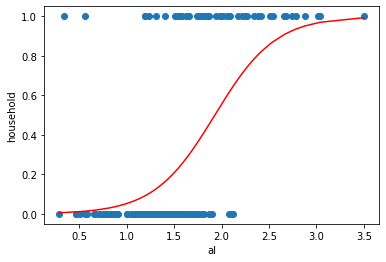

In [35]:
# Plot the predicted probabilities.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [36]:
# Examine some example predictions.
print(logreg.predict_proba(1))
print(logreg.predict_proba(2))
print(logreg.predict_proba(3))


C:\Users\91939\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=1.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [37]:
# Create a table of probability versus odds.
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability / (1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


In [38]:
# Exponential function: e^1
e = np.exp(1)
e

2.718281828459045

In [39]:
# Time needed to grow 1 unit to 2.718 units
# ln e = 1
np.log(2.718281828459) # very close to previous value


0.9999999999999832

In [40]:
np.log(e)

1.0

In [41]:
# e^5
np.exp(5)

148.4131591025766

In [42]:
# np.exp(5)
2.7182818**5


148.41315133352072

In [43]:
# Taking the log of the exponential returns back to original input
np.log(np.exp(5))

5.0

In [44]:
# Odds = 0.25
# ln 0.25 = -1.38629436
np.log(0.25)

-1.3862943611198906

In [45]:
print(e**-1.3862943611198906)
print(np.exp(-1.3862943611198906))



0.25000000000000006
0.25


In [46]:
# Add log odds to the table.
table['logodds'] = np.log(table['odds'])
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


Text(0, 0.5, 'household')

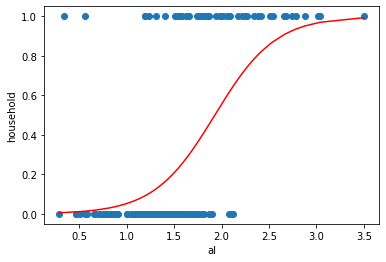

In [47]:
# Plot the predicted probabilities again.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [48]:
# Compute predicted log odds for al=2 using the equation.
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds


array([0.22101248])

In [49]:
# Convert log odds to odds.
odds = np.exp(logodds)
odds


array([1.247339])

In [50]:
# Convert odds to probability.
prob = odds/(1 + odds)
prob

array([0.5550293])

In [54]:
# Compute predicted probability for al=2 using the predict_proba method.
#logreg.predict_proba(2)[:, 1]


In [56]:
# examine the coefficient for al
zip(feature_cols, logreg.coef_[0])

Interpretation: A 1 unit increase in 'al' is associated with a 4.18 unit increase in the log-odds of 'assorted'.

In [57]:
# increasing al by 1 (so that al=3) increases the log-odds by 4.18
logodds = 0.64722323 + 4.1804038614510901
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.9920580839167457

In [59]:
# compute predicted probability for al=3 using the predict_proba method
#logreg.predict_proba(3)[:, 1]

In [60]:
# examine the intercept
logreg.intercept_


array([-6.00934605])

In [61]:
# convert log-odds to probability
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.00244968])

Interpretation: For an 'al' value of 0, the log-odds of 'assorted' is -7.71.

That makes sense from the plot above, because the probability of assorted=1 should be very low for such a low 'al' value.

Changing the  value shifts the curve horizontally, whereas changing the  value changes the slope of the curve.

In [73]:


from sklearn.linear_model import LinearRegression

from sklearn import metrics
prds = logreg.predict(X)
print (metrics.confusion_matrix(y, prds))

[[160   3]
 [ 25  26]]
